In [46]:
# %%
import pandas as pd
import numpy as np
import sklearn
import csv
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.pipeline import Pipeline
import joblib
import ast



In [47]:
def clean_data(input):
    # Replace square brackets and commas with an empty string
    cleaned_string = input.replace('[', '').replace(']', '').replace(',', '')
    return cleaned_string
# Initialize dictionaries to store the arrays
data = {'Red': 0, 'Green': 1, 'Yellow': 2, 'Temperature': 3}
path = os.path.join('samples', 'volume_arrays.csv')
samples = []
# Read the CSV file
with open(path, 'r') as file:
    reader = csv.reader(file)
    # Iterate through each row in the CSV
    for row in reader:
        name = row[0]  # Get the name
        # Parse the string representation into a list of integers
        # Remove square brackets
        array = []
        for val in row[1:]:
            array.append(int(clean_data(val)))
        # Split by commas and convert to integers
       
        
        # Store the array in the corresponding dictionary based on name
        name_code = data[name]
        samples.append((np.array(array), name_code))


In [48]:
import numpy as np

def calculate_statistics(array):
    variance = np.var(array)
    skewness = np.mean((array - np.mean(array))**3) / np.power(np.var(array), 3/2)
    kurtosis = np.mean((array - np.mean(array))**4) / np.power(np.var(array), 2) - 3
    mean = np.mean(array)
    median = np.median(array)
    std_deviation = np.std(array)
    return {
        'Variance': variance,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_deviation
    }

def clean_data(input):
    # Replace square brackets and commas with an empty string
    cleaned_string = input.replace('[', '').replace(']', '').replace(',', '')
    return cleaned_string

# Initialize dictionaries to store the arrays
data = {'Red': 0, 'Green': 1, 'Yellow': 2, 'Temperature': 3}
path = os.path.join('samples', 'volume_arrays.csv')
color_statistics = {
    'Red': {statistic: [] for statistic in ['Variance', 'Skewness', 'Kurtosis', 'Mean', 'Median', 'Standard Deviation']},
    'Green': {statistic: [] for statistic in ['Variance', 'Skewness', 'Kurtosis', 'Mean', 'Median', 'Standard Deviation']},
    'Yellow': {statistic: [] for statistic in ['Variance', 'Skewness', 'Kurtosis', 'Mean', 'Median', 'Standard Deviation']},
    'Temperature': {statistic: [] for statistic in ['Variance', 'Skewness', 'Kurtosis', 'Mean', 'Median', 'Standard Deviation']},
}

# Read the CSV file
with open(path, 'r') as file:
    reader = csv.reader(file)
    # Iterate through each row in the CSV
    for row in reader:
        name = row[0]  # Get the name
        # Parse the string representation into a list of integers
        # Remove square brackets
        array = []
        for val in row[1:]:
            array.append(int(clean_data(val)))
        # Calculate statistics for the array
        statistics = calculate_statistics(array)
        # Append statistics values to the corresponding arrays
        for statistic, value in statistics.items():
            color_statistics[name][statistic].append(value)




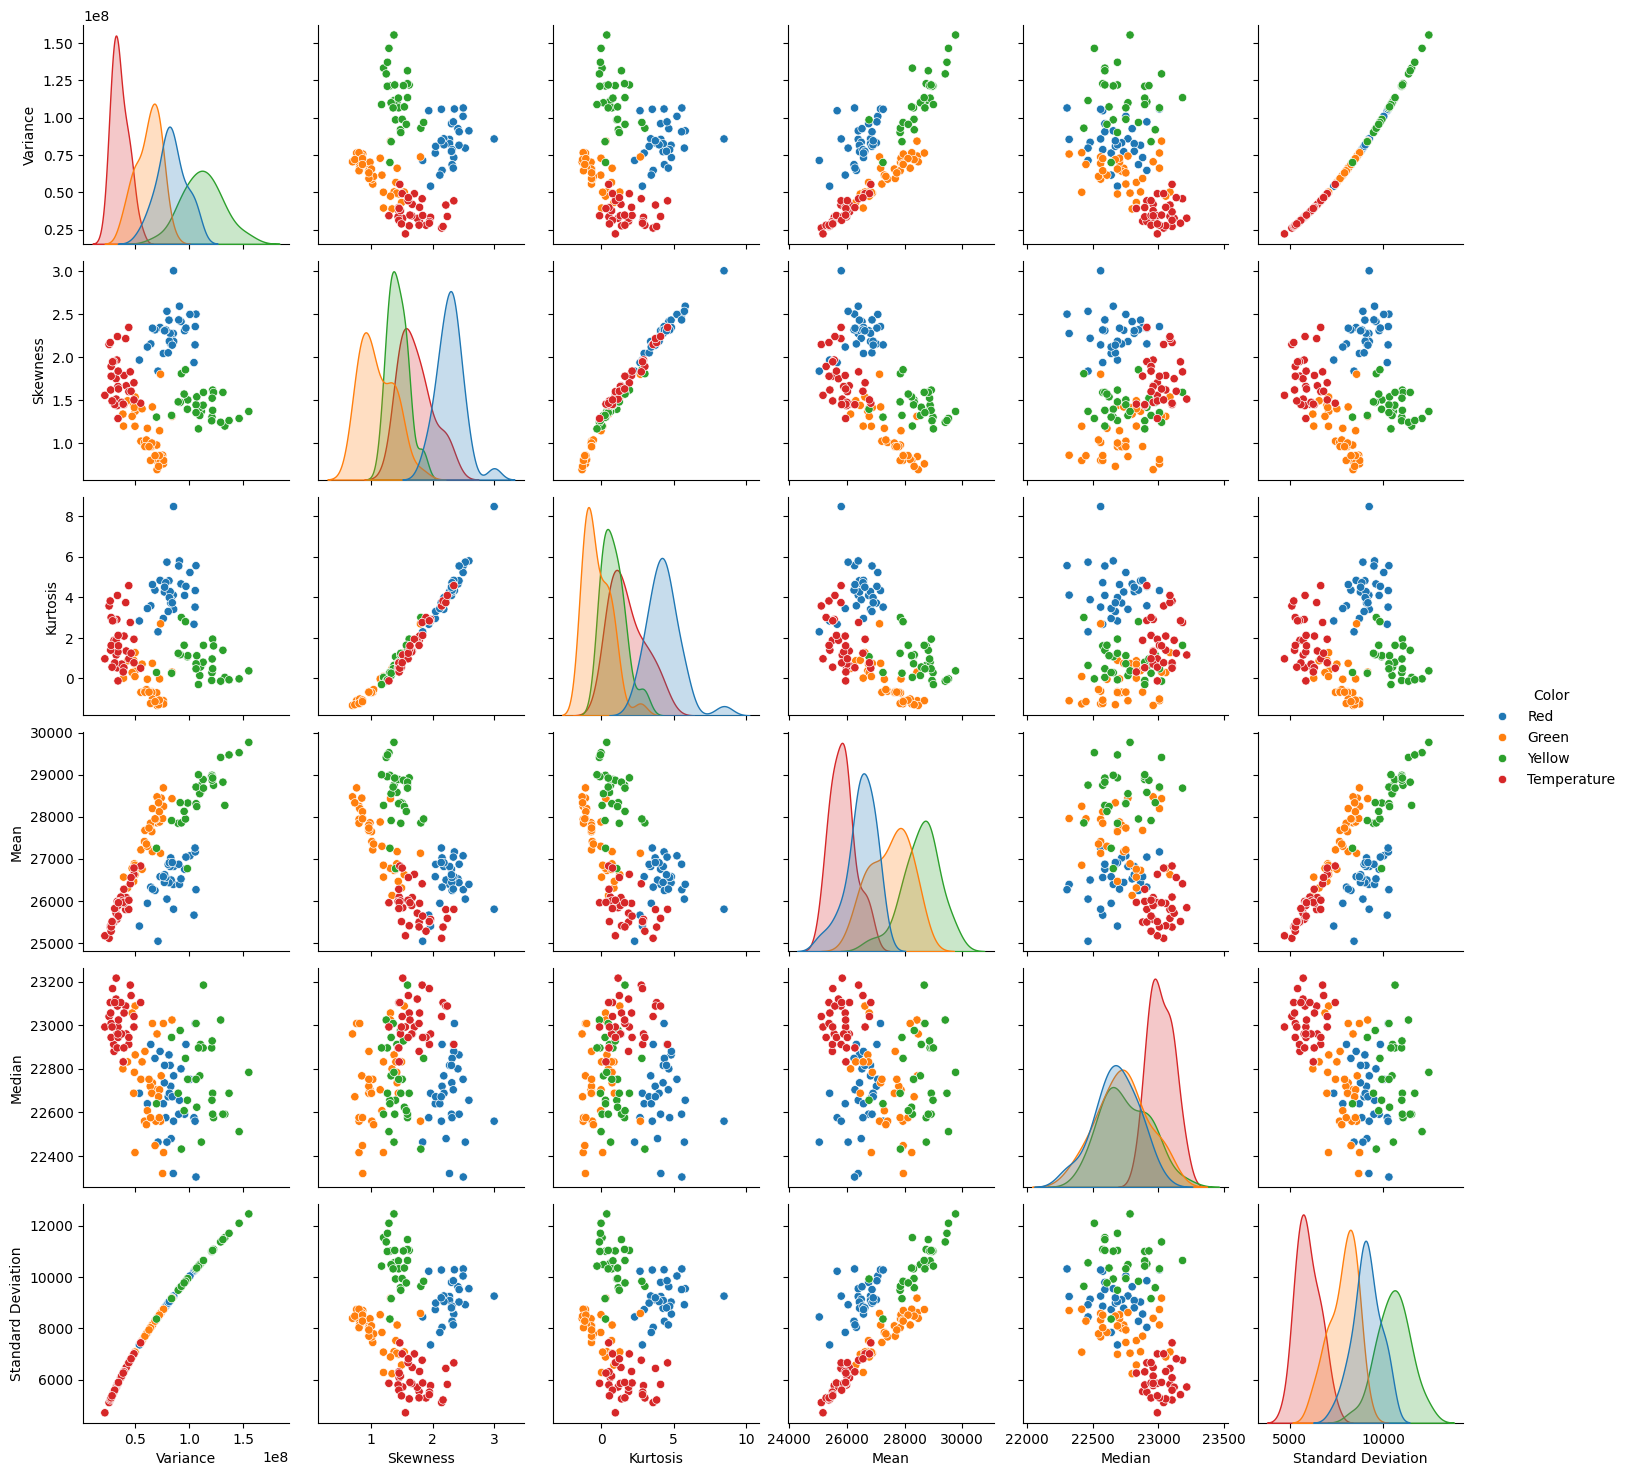

In [49]:
import seaborn as sns
import pandas as pd

# Convert the dictionary to a pandas DataFrame
df_red = pd.DataFrame(color_statistics['Red'])
df_green = pd.DataFrame(color_statistics['Green'])
df_yellow = pd.DataFrame(color_statistics['Yellow'])
df_temperature = pd.DataFrame(color_statistics['Temperature'])

# Add a 'Color' column to identify the data points
df_red['Color'] = 'Red'
df_green['Color'] = 'Green'
df_yellow['Color'] = 'Yellow'
df_temperature['Color'] = 'Temperature'

# Concatenate all DataFrames into one
df = pd.concat([df_red, df_green, df_yellow, df_temperature])

# Plot pair plots
sns.pairplot(df, hue='Color')


In [50]:
classifiers = [
        SVC(kernel='linear'),
        SVC(kernel='rbf', gamma='scale'),
        KNeighborsClassifier(n_neighbors=10),
        DecisionTreeClassifier(max_depth=5, random_state=42),
        GaussianNB(),
        RandomForestClassifier(max_depth=5, n_estimators=8, max_features=1, random_state=42),
        MLPClassifier(alpha=1, max_iter=1000, random_state=42),
        AdaBoostClassifier(algorithm="SAMME", random_state=42)
        ]

def test_classifiers(X_train, X_test, y_train, y_test, statistic):
    # List of classifiers to test
    

    # Model info to be stored as tuples with names
    models = []


    # Initialize lists to store metrics
    model_names = []
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # For each classifier check its precision, recall, f1 and accuracy
    for classifier in classifiers:
        clf = classifier
        name = f"{classifier}, {statistic}"
      
        clf.fit(X_train, y_train)
        clf_predictions = clf.predict(X_test)

        # Calculate precision, recall, accuracy and F1 score
        precision = precision_score(y_test, clf_predictions, average='weighted')
        recall = recall_score(y_test, clf_predictions, average='weighted')
        f1 = f1_score(y_test, clf_predictions, average='weighted')
        accuracy = accuracy_score(y_test, clf_predictions)
        
        # Append metrics to lists
        model_names.append(name)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        models.append((clf, name))


    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracies,
        'Precision': precisions,
        'Recall': recalls,
        'F1 Score': f1_scores
    })

    #print(f"TYPE {statistic}")
    # Print the DataFrame
    display(metrics_df)



In [51]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def get_Training(features, color_statistics):
    X = []
    y = []
    for color, statistics in color_statistics.items():
        for i in range(len(statistics[features[0]])):
            feature_values = tuple(statistics[feature][i] for feature in features)
            X.append(feature_values)
            y.append(color)

    # Convert labels to numerical values
    label_mapping = {label: index for index, label in enumerate(colors)}
    y = [label_mapping[label] for label in y]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Example usage:


In [52]:
features = ['Skewness', 'Kurtosis', 'Standard Deviation']

X_train, X_test, y_train, y_test = get_Training(features, color_statistics)
test_classifiers( X_train, X_test, y_train, y_test, 'ALL')



c:\Users\hopec\anaconda3\envs\Rasp_Pi\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hopec\anaconda3\envs\Rasp_Pi\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,"SVC(kernel='linear'), ALL",0.888889,0.911523,0.888889,0.887413
1,"SVC(), ALL",0.666667,0.718230,0.666667,0.674504
2,"KNeighborsClassifier(n_neighbors=10), ALL",0.703704,0.748148,0.703704,0.702469
3,"DecisionTreeClassifier(max_depth=5, random_sta...",0.814815,0.878189,0.814815,0.809731
4,"GaussianNB(), ALL",0.925926,0.935332,0.925926,0.925332
5,"RandomForestClassifier(max_depth=5, max_featur...",0.851852,0.893004,0.851852,0.850472
6,"MLPClassifier(alpha=1, max_iter=1000, random_s...",0.296296,0.087791,0.296296,0.135450
7,"AdaBoostClassifier(algorithm='SAMME', random_s...",0.629630,0.554497,0.629630,0.544856


In [53]:
features = ['Skewness', 'Standard Deviation']

X_train, X_test, y_train, y_test = get_Training(features, color_statistics)
test_classifiers( X_train, X_test, y_train, y_test, 'ALL')

c:\Users\hopec\anaconda3\envs\Rasp_Pi\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hopec\anaconda3\envs\Rasp_Pi\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,"SVC(kernel='linear'), ALL",0.814815,0.846561,0.814815,0.814815
1,"SVC(), ALL",0.666667,0.717695,0.666667,0.673057
2,"KNeighborsClassifier(n_neighbors=10), ALL",0.703704,0.748148,0.703704,0.702469
3,"DecisionTreeClassifier(max_depth=5, random_sta...",0.888889,0.911523,0.888889,0.887413
4,"GaussianNB(), ALL",0.925926,0.935332,0.925926,0.925332
5,"RandomForestClassifier(max_depth=5, max_featur...",0.888889,0.911523,0.888889,0.887413
6,"MLPClassifier(alpha=1, max_iter=1000, random_s...",0.222222,0.049383,0.222222,0.080808
7,"AdaBoostClassifier(algorithm='SAMME', random_s...",0.629630,0.554497,0.629630,0.544856


0.9259259259259259


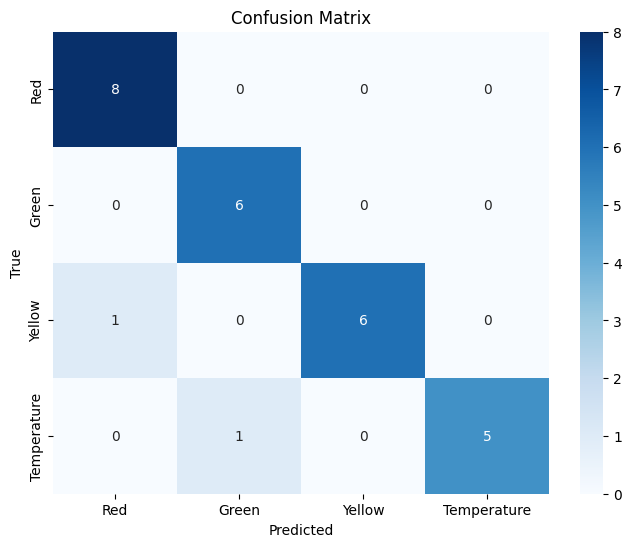

In [54]:
features = ['Skewness', 'Kurtosis', 'Standard Deviation']

X_train, X_test, y_train, y_test = get_Training(features, color_statistics)

clf = GaussianNB()
      
clf.fit(X_train, y_train)
clf_predictions = clf.predict(X_test)

# Calculate precision, recall, accuracy and F1 score
precision = precision_score(y_test, clf_predictions, average='weighted')
recall = recall_score(y_test, clf_predictions, average='weighted')
f1 = f1_score(y_test, clf_predictions, average='weighted')
accuracy = accuracy_score(y_test, clf_predictions)

print(accuracy) 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, clf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Red', 'Green', 'Yellow', 'Temperature'], yticklabels=['Red', 'Green', 'Yellow', 'Temperature'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [55]:
joblib.dump(clf, 'trained_model_audio.pkl')